A system predicting whether to give loan or not to customers.

workflow:
1. Data collection
2. Data pre preocessing 
3. train test split
4. feed data to support vector machine model[supervised ML model]
5. use trained support vector machine model to predict to give loan or not 

In [313]:
#libraries needed
import numpy as np # arrays needed
import pandas as pd # for pandas Dataframe
pd.options.mode.chained_assignment = None  # default='warn'
import warnings
from lazypredict.Supervised import LazyRegressor
warnings.filterwarnings("ignore")
import seaborn as sns# data visualisation 
import matplotlib.pyplot as plt # data visualisation
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.metrics import accuracy_score

Data collection and processing

In [314]:
#loading dataset to pandas Dataframe
loan_dataset = pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')

In [315]:
type(loan_dataset) # Dataframe object

pandas.core.frame.DataFrame

In [316]:
#printing first 5 rows of the dataset
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.00,NaN,360.00,1.00,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.00,128.00,360.00,1.00,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.00,120.00,360.00,1.00,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban,Y


In [317]:
#printing last 5 rows of the dataset
loan_dataset.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.00,71.00,360.00,1.00,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.00,40.00,180.00,1.00,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.00,253.00,360.00,1.00,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.00,187.00,360.00,1.00,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.00,133.00,360.00,0.00,Semiurban,N


In [318]:
#number of rows and columns 
loan_dataset.shape

(614, 13)

In [319]:
#statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.00,614.00,592.00,600.00,564.00
mean,5403.46,1621.25,146.41,342.00,0.84
std,6109.04,2926.25,85.59,65.12,0.36
min,150.00,0.00,9.00,12.00,0.00
25%,2877.50,0.00,100.00,360.00,1.00
50%,3812.50,1188.50,128.00,360.00,1.00
75%,5795.00,2297.25,168.00,360.00,1.00
max,81000.00,41667.00,700.00,480.00,1.00


In [320]:
# we can see there is some missing values in some attributes
# number of missing values in each column 
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [321]:
#droping the missing values
loan_dataset = loan_dataset.dropna()

In [322]:
loan_dataset.isnull().sum() # no missing values anymore

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [323]:
#label encoding to replace  Y --> 1 and N --> 0

In [324]:
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True) # pandas encoding function

In [325]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.00,128.00,360.00,1.00,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.00,120.00,360.00,1.00,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.00,267.00,360.00,1.00,Urban,1


In [326]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [327]:
# need to replace the value of 3+ to 4 as we can't have 3+
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [328]:
# dependent values, checking replaced values
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

Data visualization

<Axes: xlabel='Education', ylabel='count'>

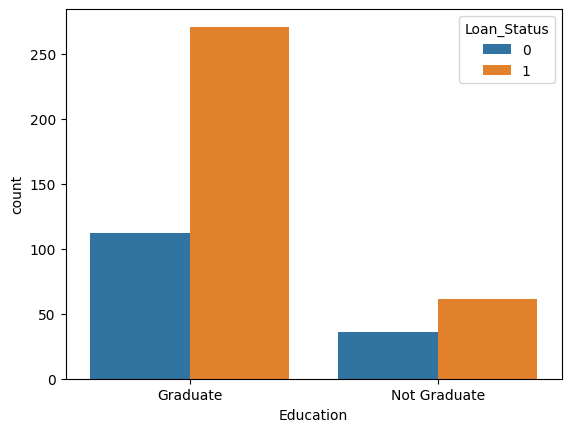

In [329]:
# education & Loan status
sns.countplot(x='Education',hue='Loan_Status', data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

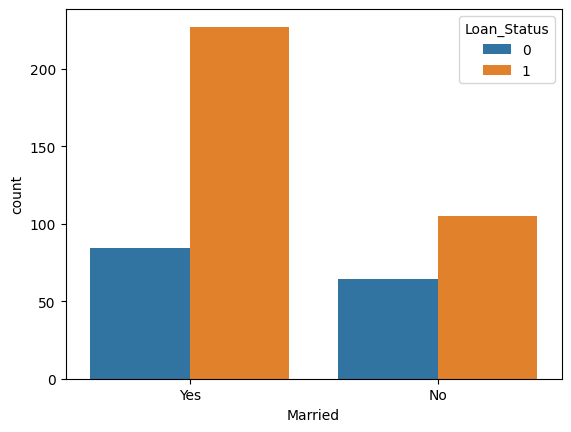

In [330]:
# marital & Loan status
sns.countplot(x='Married',hue='Loan_Status', data=loan_dataset) 

In [331]:
# converting categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0}, 'Self_Employed':{'No':0,'Yes':1}, 'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':0,'Not Graduate':1}},inplace=True)

In [332]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.00,128.00,360.00,1.00,0,0
2,LP001005,1,1,0,0,1,3000,0.00,66.00,360.00,1.00,2,1
3,LP001006,1,1,0,1,0,2583,2358.00,120.00,360.00,1.00,2,1
4,LP001008,1,0,0,0,0,6000,0.00,141.00,360.00,1.00,2,1
5,LP001011,1,1,2,0,1,5417,4196.00,267.00,360.00,1.00,2,1


In [333]:
# Loan_ID is useless so will drop it
#seperating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'], axis=1)
Y = loan_dataset['Loan_Status']

In [334]:
print (X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          0              0             4583   
2         1        1          0          0              1             3000   
3         1        1          0          1              0             2583   
4         1        0          0          0              0             6000   
5         1        1          2          0              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          0              0             2900   
610       1        1          4          0              0             4106   
611       1        1          1          0              0             8072   
612       1        1          2          0              0             7583   
613       0        0          0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Train test split

In [335]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y,random_state=2)

In [336]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


Training the model using Support vector machine model

In [337]:
classifier = svm.SVC(kernel='linear')

In [338]:
# training the supported vector machine model
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation


In [339]:
#accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [340]:
print('Accuracy on training data: ', training_data_accuracy)

Accuracy on training data:  0.7916666666666666


In [341]:
#accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [342]:
print('Accuracy on training data: ', test_data_accuracy)

Accuracy on training data:  0.8541666666666666


Making a predictive system

In [343]:
# sample input from gender to Property_Area = 1,1,4,1,0,3036,2504.0,158.0,360.0,0.0,1
input_data = (1,1,4,1,0,3036,2504.0,158.0,360.0,0.0,1)

#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting one instance
input_reshaping = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_reshaping) # predicting

if (prediction[0]==0):
    print('this person is not eligible for a loan')
else:
    print('this person is  eligible for a loan')

this person is not eligible for a loan


In [355]:
def calculate_loan_amount_estimate_for_dataframe(data):
    # Define coefficients for the correlation
    applicant_income_coeff = 0.6
    coapplicant_income_coeff = 0.4

    # Calculate the estimated loan amount for all rows
    data['Estimated_Loan_Amount'] = (data['ApplicantIncome'] * applicant_income_coeff) + (data['CoapplicantIncome'] * coapplicant_income_coeff)

    return data['Estimated_Loan_Amount']

# Assuming your dataset is in a DataFrame called 'loan_data'
estimated_loan_amounts = calculate_loan_amount_estimate_for_dataframe(loan_dataset)

# Now 'estimated_loan_amounts' contains the estimated loan amounts for all rows in your DataFrame

In [356]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Estimated_Loan_Amount,Loan_Confidence_Index
1,LP001003,1,1,1,0,0,4583,1508.00,128.00,360.00,1.00,0,0,3353.00,0.06
2,LP001005,1,1,0,0,1,3000,0.00,66.00,360.00,1.00,2,1,1800.00,0.01
3,LP001006,1,1,0,1,0,2583,2358.00,120.00,360.00,1.00,2,1,2493.00,0.09
4,LP001008,1,0,0,0,0,6000,0.00,141.00,360.00,1.00,2,1,3600.00,0.02
5,LP001011,1,1,2,0,1,5417,4196.00,267.00,360.00,1.00,2,1,4928.60,0.16


In [357]:
def calculate_loan_confidence_index(data):
    # Define weights for each feature category
    financial_weights = {
        'ApplicantIncome': 0.2,
        'CoapplicantIncome': 0.1,
        'LoanAmount': 0.2,
        'Loan_Amount_Term': 0.1,
    }
    ApplicantIncome_weight = 0.2
    CoapplicantIncome_weight = 0.1
    LoanAmount_weight =  0.2
    Loan_Amount_Term_weight = 0.1
    credit_history_weight = 0.3
    social_factors_weight = 0.2

    Loan_Amount_score = data['LoanAmount'] * LoanAmount_weight
    CoapplicantIncome_score = data['CoapplicantIncome'] * CoapplicantIncome_weight
    Loan_Amount_Term_score = data['Loan_Amount_Term'] * Loan_Amount_Term_weight
    Loan_Amount_score = data['LoanAmount'] * LoanAmount_weight
    # Calculate Credit History Score
    credit_history_score = data['Credit_History'] * credit_history_weight

    # Introduce a social factors component based on being married and having dependents
    social_factors_score = ((data['Married'].astype(int) + data['Dependents'].astype(int)) * social_factors_weight)

    # Combine scores to get Loan Confidence Index
    data['Loan_Confidence_Index'] = credit_history_score + social_factors_score + Loan_Amount_score + CoapplicantIncome_score + Loan_Amount_Term_score + Loan_Amount_score

    # Normalize to range [0, 1]
    min_index = data['Loan_Confidence_Index'].min()
    max_index = data['Loan_Confidence_Index'].max()
    data['Loan_Confidence_Index'] = (data['Loan_Confidence_Index'] - min_index) / (max_index - min_index)


    return data['Loan_Confidence_Index']


In [358]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Estimated_Loan_Amount,Loan_Confidence_Index
1,LP001003,1,1,1,0,0,4583,1508.00,128.00,360.00,1.00,0,0,3353.00,0.06
2,LP001005,1,1,0,0,1,3000,0.00,66.00,360.00,1.00,2,1,1800.00,0.01
3,LP001006,1,1,0,1,0,2583,2358.00,120.00,360.00,1.00,2,1,2493.00,0.09
4,LP001008,1,0,0,0,0,6000,0.00,141.00,360.00,1.00,2,1,3600.00,0.02
5,LP001011,1,1,2,0,1,5417,4196.00,267.00,360.00,1.00,2,1,4928.60,0.16


In [359]:
# Adding Loan_Confidence_Index column into dataset

loan_dataset['Loan_Confidence_Index'] = calculate_loan_confidence_index(loan_dataset)


In [360]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Estimated_Loan_Amount,Loan_Confidence_Index
1,LP001003,1,1,1,0,0,4583,1508.00,128.00,360.00,1.00,0,0,3353.00,0.06
2,LP001005,1,1,0,0,1,3000,0.00,66.00,360.00,1.00,2,1,1800.00,0.01
3,LP001006,1,1,0,1,0,2583,2358.00,120.00,360.00,1.00,2,1,2493.00,0.09
4,LP001008,1,0,0,0,0,6000,0.00,141.00,360.00,1.00,2,1,3600.00,0.02
5,LP001011,1,1,2,0,1,5417,4196.00,267.00,360.00,1.00,2,1,4928.60,0.16


In [361]:
loan_dataset.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Estimated_Loan_Amount,Loan_Confidence_Index
count,480.00,480.00,480.00,480.00,480.00,480.00,480.00,480.00,480.00,480.00,480.00,480.00,480.00
mean,0.82,0.65,0.20,0.14,5364.23,1581.09,144.74,342.05,0.85,1.02,0.69,3850.98,0.07
std,0.38,0.48,0.40,0.34,5668.25,2617.69,80.51,65.21,0.35,0.78,0.46,3443.98,0.08
min,0.00,0.00,0.00,0.00,150.00,0.00,9.00,36.00,0.00,0.00,0.00,810.00,0.00
25%,1.00,0.00,0.00,0.00,2898.75,0.00,100.00,360.00,1.00,0.00,0.00,2296.20,0.02
50%,1.00,1.00,0.00,0.00,3859.00,1084.50,128.00,360.00,1.00,1.00,1.00,2933.50,0.05
75%,1.00,1.00,0.00,0.00,5852.50,2253.25,170.00,360.00,1.00,2.00,1.00,4223.65,0.09
max,1.00,1.00,1.00,1.00,81000.00,33837.00,600.00,480.00,1.00,2.00,1.00,48600.00,1.00


In [362]:
correlation = loan_dataset.corr(numeric_only=True)

<Axes: >

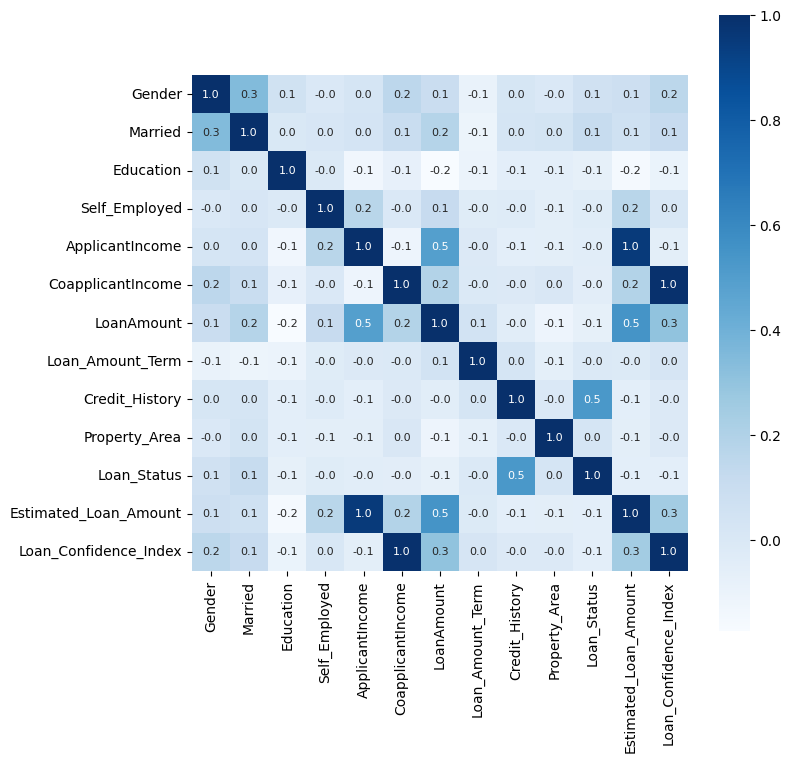

In [363]:
# constructing a heatmap to understand correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True,annot_kws={'size':8}, cmap='Blues')